#HCMLD'21 Week1 Exploratory Data Analysis Exercise
Diabetes is a chronic condition in which the body develops a resistance to insulin, a hormone which converts food into glucose. Diabetes affect many people worldwide and is normally divided into Type 1 and Type 2 diabetes. Both have different characteristics. The dataset can be found on the Kaggle website. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and can be used to predict whether a patient has diabetes based on certain diagnostic factors. 

In [ ]:
# Import packages
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
import numpy
from scipy.stats import shapiro
import seaborn as sns

# Increase the plot size
pyplot.rcParams['figure.dpi'] = 100 

In [ ]:
# Import data from URL.
url = 'https://raw.githubusercontent.com/klee141/hcmld21/main/Datasets/pima-indians-diabetes.csv'

In [ ]:
# This is how you can install pacakges in Google CoLab. Don't need to run twice
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 16.3MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 1.1MB 46.8MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 296kB 35.5MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a850d6298e903b7625b73c8dd6f626cfd4b806d0d8826636186d278c5d34e916
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=9c7ab0cb95038c8c1b368584c0fe68ba6cb0eb317a3d945c6d10929bcff0ce91
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [ ]:
# Define column names
names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = read_csv(url, names=names)

#EDA using Pandas Profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

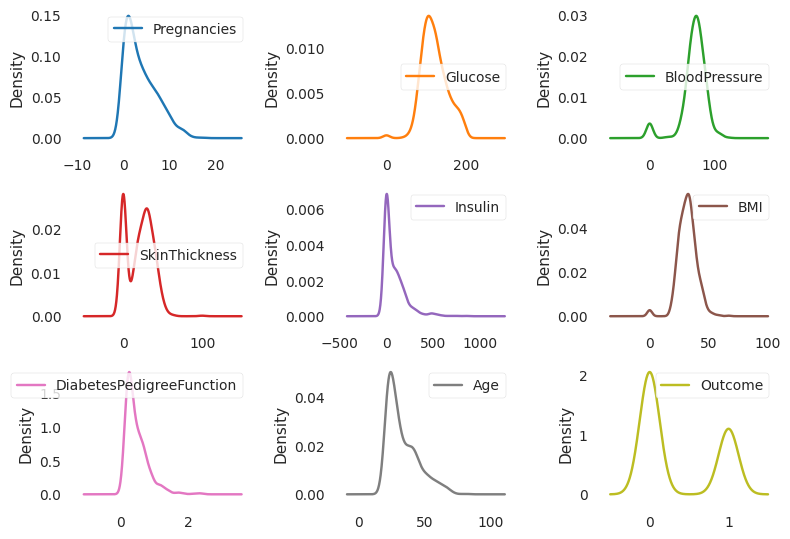

In [ ]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.tight_layout()
pyplot.legend()
pyplot.show()

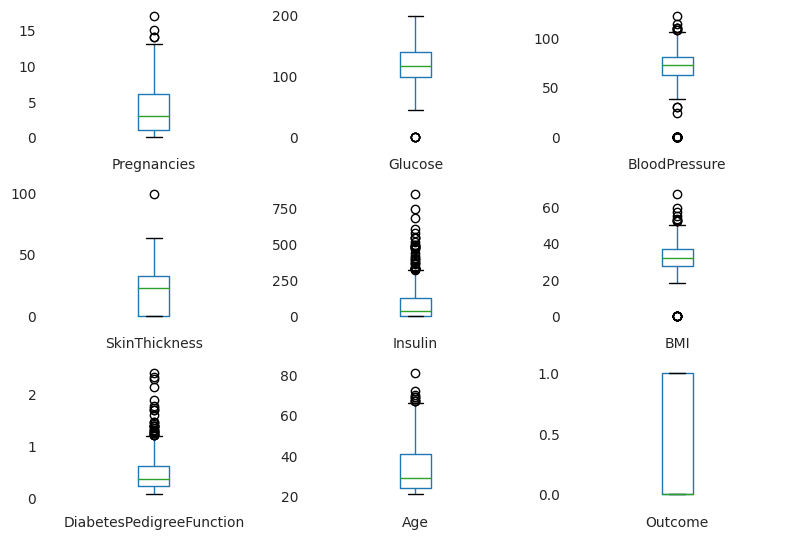

In [ ]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.tight_layout()
pyplot.show()

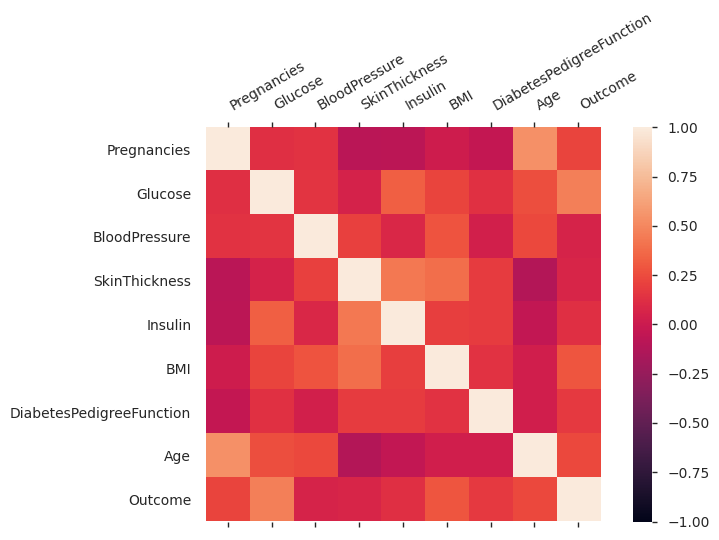

In [ ]:
# Correction Matrix Plot
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.xticks(rotation=30, ha='left')
pyplot.tight_layout()
pyplot.show()

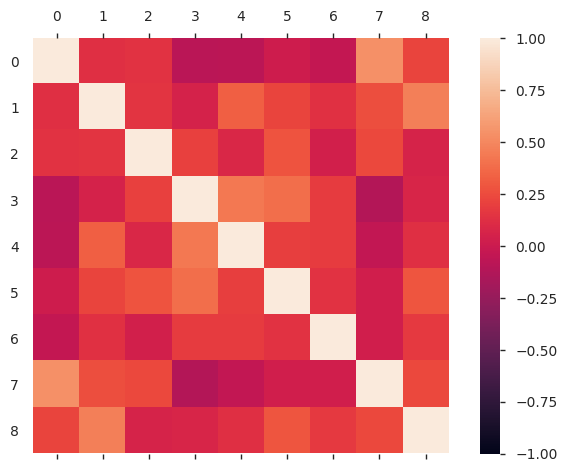

In [ ]:
# Correction Matrix Plot (generic)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

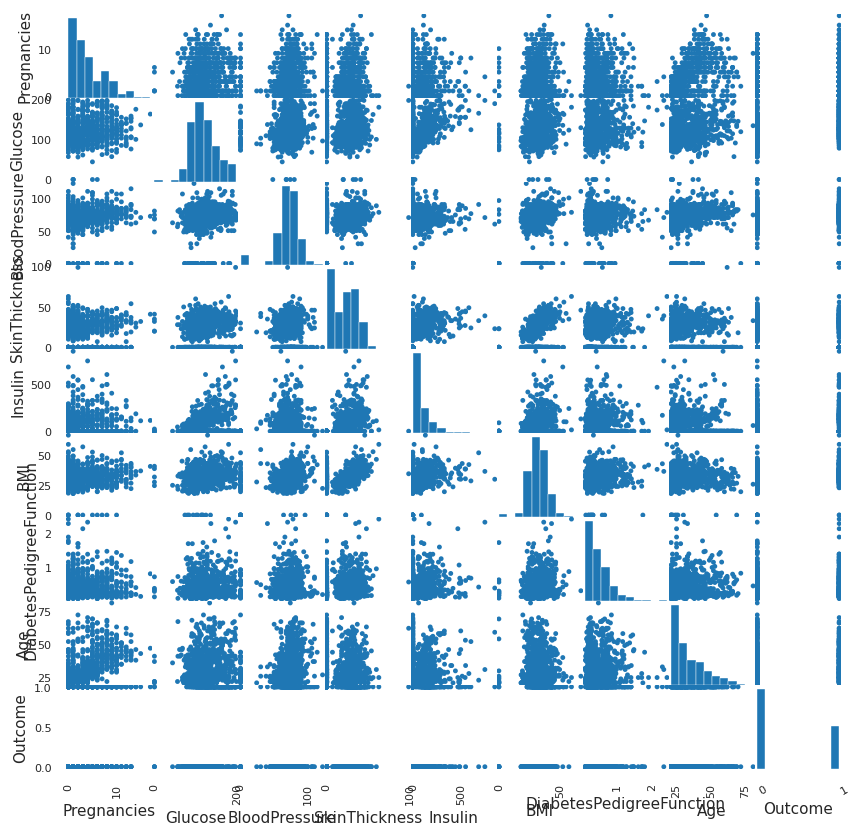

In [ ]:
# Scatterplot Matrix
# Pleaes note that from pandas.tools.plotting import scatter_matrix will not work
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=1, figsize=(10,10))


ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.xticks(rotation=30, ha='left')
#pyplot.tight_layout()

pyplot.show()

Statistics=0.819, p=0.000


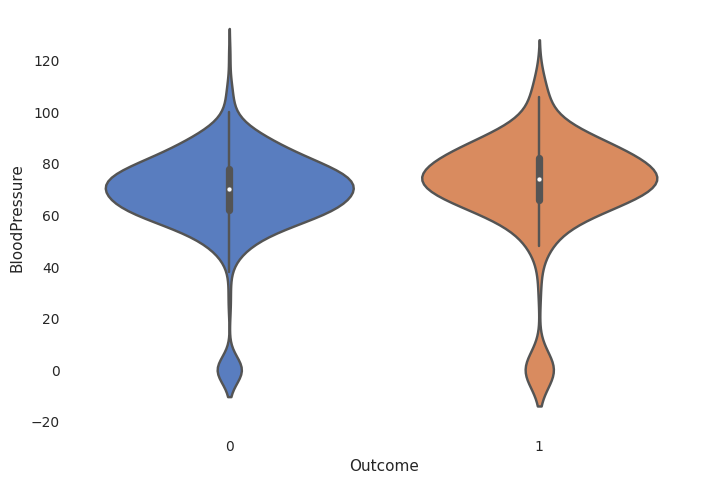

In [ ]:
stat, p = shapiro(data['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
Statistics=0.819
p=0.000

#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=data, palette='muted', split=True)

# Exercise
## 1.1. Change the size of plots properly and try to adjust each axis' label as much as you can to improve the visualization?
## 1.2. Can you interpret the data? From your perspective, which factors will be the most important to predict diabetes? Why? Please take two examples by adding one more mark down section below and explain it briefly (less than 100 words)
## 1.3. What other factors play role here? Why? Please another example by adding one more mark down section below and explain it briefly (less than 100 words)
## 1.4 Change the filename properly, and update the results (.ipynb) to the class github

1.2. Glucose
The first reason is it is one of having no 'zeros' factors. I thought 'zeros' means no corelated options and the no 'zeros' factors are only "Glucose", "Pedigree" and "Outcome", but "Outcome" is just showing the outcome of test. Next, I focused the corelated graphes and "Glucose" is the only factor having the max value about corelation with "Outcome". 

1.3. Insulin
The reason is from the corelated graph, it is the most related factor with glucose.
